In [1]:
# Internship TCS iON Side effects of a drug -ICTAK NORKA DSA Batch2 - Bindhu K George

In [2]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data1 = Faker()

def create_names(n):
   name = []
   for _ in range(0, n):
        name.append(data1.name())
   return name

name = create_names(400000)

patient_id = np.random.randint(1, 400000, size = 400000, dtype = 'int')

data2 = pd.DataFrame(list(zip(patient_id,name,)),
                   columns = [ 'patient_id','name'])

data2

import numpy as np

def weighted_cartesian_choice(*iterables):
    
   # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list 
    #with a chocie from each population
    
    res = []
    for population, weights in iterables:
     #normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res

gender = (['male','female'], 
          [0.3, 0.7])

age = (['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'], 
       [.08,.05,.07,.18,.05,.16,.06,.19,.07,.09])
race = (['White','Hispanic', 'Black','Asian'], 
        [.32,.28,.22,.18])
side_effects = (['No Side Effects', 'Mild Side Effects', 'Moderate Side Effects', 'Severe Side Effects', 'Extremely Severe Side Effects'], 
               [.12,.20,.28,.22,.18])

list=[]
for i in range(400000):
    res = weighted_cartesian_choice(gender,
                                    age,
                                    race,
                                    side_effects)
    list.append(res)
  

newdata=pd.DataFrame(list, columns = ['gender','age','race','side_effects'])

newdata.head(40)

 data = pd.concat([data2, newdata], axis=1).reindex(newdata.index)

data.head()

sample_dataset = data.to_csv("dataset.csv",index=False)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading Dataset

In [5]:
data = pd.read_csv('dataset.csv')

In [6]:
# Features

data.head()

data.shape

data.info()

data['age'].value_counts()

data['gender'].value_counts()

data['race'].value_counts()

data['side_effects'].value_counts()

In [7]:
# The correlation between craeted features is low, so mapping is done for improving accuracy

In [8]:
data.loc[data['age'] == '0-10', 'age_score'] = '6'  
data.loc[data['age'] == '10-20', 'age_score'] = '2' 
data.loc[data['age'] == '20-30', 'age_score'] = '5'  
data.loc[data['age'] == '30-40', 'age_score'] = '9'  
data.loc[data['age'] == '40-50', 'age_score'] = '1' 
data.loc[data['age'] == '50-60', 'age_score'] = '8'  
data.loc[data['age'] == '60-70', 'age_score'] = '3'  
data.loc[data['age'] == '70-80', 'age_score'] = '10' 
data.loc[data['age'] == '80-90', 'age_score'] = '4'  
data.loc[data['age'] == '90-100', 'age_score'] = '7'  

In [9]:
data.loc[data['side_effects'] == 'Moderate Side Effects', 'sideeffects_score'] = '5'  
data.loc[data['side_effects'] == 'Severe Side Effects', 'sideeffects_score'] = '4' 
data.loc[data['side_effects'] == 'Mild Side Effects', 'sideeffects_score'] = '3'  
data.loc[data['side_effects'] == 'Extremely Severe Side Effects', 'sideeffects_score'] = '2'  
data.loc[data['side_effects'] == 'No Side Effects', 'sideeffects_score'] = '1' 

In [10]:
data.loc[data['race'] == 'White', 'race_score'] = '4'  
data.loc[data['race'] == 'Hispanic', 'race_score'] = '3' 
data.loc[data['race'] == 'Black', 'race_score'] = '2'  
data.loc[data['race'] == 'Asian', 'race_score'] = '1'  


In [11]:
data.loc[data['gender'] == 'male', 'gender_score'] = '4'  
data.loc[data['gender'] == 'female', 'gender_score'] = '6' 


In [12]:
data = data.astype({'age_score': 'int','race_score': 'int','sideeffects_score': 'int','gender_score': 'int'})

data.dtypes

In [13]:
data['score']=data['age_score']+data['race_score']+data['sideeffects_score']+data['gender_score']

In [14]:
data['average_score']=data['score']/2

data

data.dtypes

In [15]:
# Visualisation

count = data['side_effects'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('side_effects', fontsize=12)
plt.title('Side Effects of A Drug X')
plt.show()

In [16]:
# Feature- Race

# Race types and its values Single Pie chart
populations = data['race'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'White','Hispanic','Black','Asian'
colors = ['#FEB8EA','#99ff99','#F75ECB','#FCE38A']
explode = (0, 0.2,0,0)  # explode 1st slice
fig = plt.figure(figsize=(10,5))
# Plot
plt.title('Race Type Percentange', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

In [17]:
fe=data.groupby('race').size()/len(data)
data.loc[:, 'race_fe']=data['race'].map(fe)

In [18]:
fe=data.groupby('gender').size()/len(data)
data.loc[:, 'gender_fe']=data['gender'].map(fe)

In [19]:
fe=data.groupby('age').size()/len(data)
data.loc[:, 'age_fe']=data['age'].map(fe)

In [20]:
data=data.drop(['patient_id','race','gender','age'],axis=1)
data

,name,side_effects,age_score,sideeffects_score,race_score,gender_score,score,average_score,race_fe,gender_fe,age_fe
0,Pamela Ingram,No Side Effects,9,1,1,6,17,8.5,0.180333,0.698295,0.180055
1,Mark Mcdonald,Mild Side Effects,7,3,3,6,19,9.5,0.279803,0.698295,0.090100
2,Christian Perez,Severe Side Effects,5,4,3,4,16,8.0,0.279803,0.301705,0.070178
3,Amy Middleton,No Side Effects,7,1,1,6,15,7.5,0.180333,0.698295,0.090100
4,Nicole Davis,Moderate Side Effects,10,5,1,4,20,10.0,0.180333,0.301705,0.188663
...,...,...,...,...,...,...,...,...,...,...,...
399995,Phyllis Murphy,Moderate Side Effects,10,5,4,4,23,11.5,0.319153,0.301705,0.188663
399996,Jennifer Bowen,No Side Effects,6,1,4,6,17,8.5,0.319153,0.698295,0.080092
399997,Kelly Sutton,Mild Side Effects,9,3,1,6,19,9.5,0.180333,0.698295,0.180055
399998,Tara Washington,Mild Side Effects,8,3,4,6,21,10.5,0.319153,0.698295,0.160510


data.columns

data.shape

In [21]:
data=data.drop(['name','age_score','race_score','sideeffects_score','gender_score', 'score'],axis=1)
data

,side_effects,average_score,race_fe,gender_fe,age_fe
0,No Side Effects,8.5,0.180333,0.698295,0.180055
1,Mild Side Effects,9.5,0.279803,0.698295,0.090100
2,Severe Side Effects,8.0,0.279803,0.301705,0.070178
3,No Side Effects,7.5,0.180333,0.698295,0.090100
4,Moderate Side Effects,10.0,0.180333,0.301705,0.188663
...,...,...,...,...,...
399995,Moderate Side Effects,11.5,0.319153,0.301705,0.188663
399996,No Side Effects,8.5,0.319153,0.698295,0.080092
399997,Mild Side Effects,9.5,0.180333,0.698295,0.180055
399998,Mild Side Effects,10.5,0.319153,0.698295,0.160510


In [22]:
#Encoding Side Effects feature

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data["side_effects"])
data["side_effects"]=encoder.transform(data["side_effects"])
print(data["side_effects"])

0         3
1         1
2         4
3         3
4         2
         ..
399995    2
399996    3
399997    1
399998    1
399999    2
Name: side_effects, Length: 400000, dtype: int32


data.info()

data.describe()

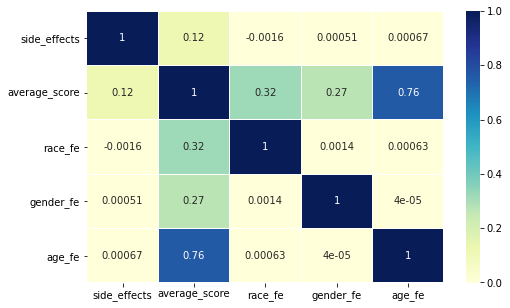

In [24]:
corrmatrix=data.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

corrmatrix.iloc[0]

In [25]:
# Target and Features

In [26]:
x=data.drop('side_effects',axis=1)
y=data['side_effects'] 
x.head()

,average_score,race_fe,gender_fe,age_fe
0,8.5,0.180333,0.698295,0.180055
1,9.5,0.279803,0.698295,0.090100
2,8.0,0.279803,0.301705,0.070178
3,7.5,0.180333,0.698295,0.090100
4,10.0,0.180333,0.301705,0.188663


In [27]:
x.dtypes

average_score    float64
race_fe          float64
gender_fe        float64
age_fe           float64
dtype: object

In [28]:
#Splitting the dataset
#training the dataset

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [53]:
x.shape

(400000, 4)

In [54]:
x_train.shape

(260000, 4)

In [55]:
x_test.shape

(140000, 4)

In [56]:
y_train.shape

(260000,)

In [57]:
y_test.shape

(140000,)

In [30]:
# LR

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [32]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_predlr = logit_model.predict(x_test)

In [33]:
print(accuracy_score(y_test,y_predlr))

0.5829571428571428


In [34]:
#Decision Tree

In [35]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_preddt=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_preddt))

1.0


In [36]:
y_pred=clf.predict(x_test)
print(y_test, y_preddt)

23218     0
20731     2
39555     1
147506    4
314215    0
         ..
362985    4
124599    1
291845    1
365050    2
138199    4
Name: side_effects, Length: 140000, dtype: int32 [0 2 1 ... 1 2 4]


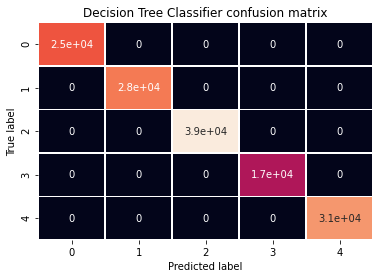

In [37]:
cfm=confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

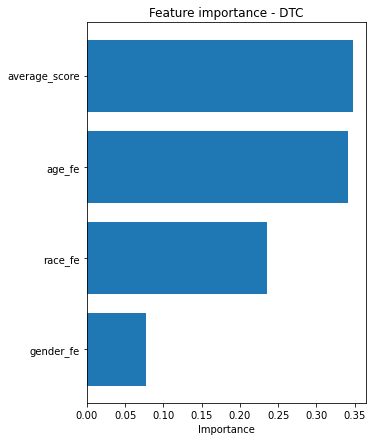

In [38]:
features_list = x.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance - DTC')
plt.draw()
plt.show()

#Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
modelext = ExtraTreesClassifier()
modelext.fit(x_train,y_train)  

y_predext=modelext.predict(x_test)
print(y_test, y_predext)

print('accuracy is:', accuracy_score(y_test,y_predext))

print(modelext.feature_importances_)

ranked_features=pd.Series(modelext.feature_importances_,index=x.columns)

ranked_features.nlargest(21).plot(kind='barh') 
plt.show()

In [39]:
# Random Forest

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train.values.ravel())
y_predrf=rf.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))

Accuracy: 1.0


In [42]:
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_predrf, average='macro' )
f1_score(y_test, y_predrf, average='micro')
f1_score(y_test, y_predrf, average='weighted')
f1_score(y_test, y_predrf, average=None)

array([1., 1., 1., 1., 1.])

In [43]:
confusion_matrix(y_test,y_predrf)

array([[25159,     0,     0,     0,     0],
       [    0, 28194,     0,     0,     0],
       [    0,     0, 39090,     0,     0],
       [    0,     0,     0, 16857,     0],
       [    0,     0,     0,     0, 30700]], dtype=int64)

In [44]:
accuracy_score(y_test,y_predrf)

1.0

In [45]:
#Feature Importance in Random Forest

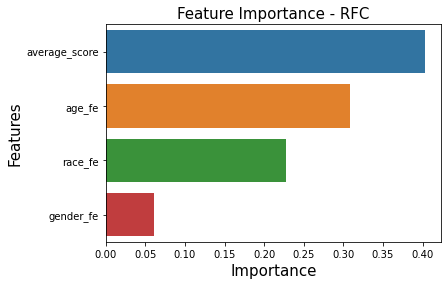

In [46]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features[0:20])

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance - RFC', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [47]:
# Hyperparameter tuning of random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfh = RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=2,
                      min_samples_split=5, n_estimators=1500, n_jobs=1,
                      random_state=42)
rfh.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1500, n_jobs=1,
                       random_state=42)

In [49]:
y_predrfh=rfh.predict(x_test)

In [50]:
y_predrfh

array([3, 2, 1, ..., 2, 2, 4])

In [51]:
accuracy_score(y_test,y_predrfh)

0.6499928571428571

In [52]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predrfh))

Accuracy: 0.6499928571428571
